In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


def get_avg_results(settings_files, alg):    
    dataset = settings_files[0].split('_')[0]
    test_acc_list = []
    for i, set in enumerate(settings_files):
        results_path = f"../results/{dataset}/{alg}/{set}_w0"

        with open(f"{results_path}/fedavg_test_results.npy", "rb") as f:
            test_accs = np.load(f)
            test_losses = np.load(f)

        test_acc_list.append(test_accs[-1])


    return np.mean(test_acc_list), np.std(test_acc_list)

def get_feded_results(settings_files, n_pub, model, loss, weight_scheme, summary=True):

    test_acc_lists = []
    ensemble_test_acc = []
    dataset = settings_files[0].split('_')[0]

    for i, set in enumerate(settings_files):
        results_path = f"../results/{dataset}/feded/{set}_{model}_{loss}_w{weight_scheme}"

        with open(f"{results_path}/student_test_results_{n_pub}.npy", "rb") as f:
            test_acc_lists.append(np.load(f)[0])

            
        with open(f"{results_path}/ensemble_test_acc.npy", "rb") as f:
            ensemble_test_acc.append(np.load(f)[0])

    if summary:
        return (np.mean(test_acc_lists), np.std(test_acc_lists)), (np.mean(ensemble_test_acc), np.std(ensemble_test_acc))
    else:
        return test_acc_lists, ensemble_test_acc
                                                                

# Tables

In [13]:
seeds = [1,2,3,4,5]
n_clients = 10
n_pub = 60000
model = "emnist_cnn1"
student_model = "cnn3"

dists = ["niid10.0", "niid1.0", "niid0.1", "niid0.01"]

table = "\\begin{table}[]\n\\centering\n\\begin{tabular}{c|cccc}\n"
table += "Algorithm & $\\alpha=10$ & $\\alpha=1$ & $\\alpha=0.1$ & $\\alpha=0.01$ \\\\ \\hline \n"

table += "\\textsc{FedAvg} "

for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    m, s = get_avg_results(settings_files, "fedavg")
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\textsc{FedProx} "

for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    m, s = get_avg_results(settings_files, "fedprox")
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\textsc{Ensemble} "
for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    _, (m, s) = get_feded_results(settings_files, n_pub, student_model, "mse", 0)
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\textsc{Ensemble-w1} "
for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    _, (m, s) = get_feded_results(settings_files, n_pub, student_model, "mse", 1)
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\textsc{Ensemble-w2} "
for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    _, (m, s) = get_feded_results(settings_files, n_pub, student_model, "mse", 2)
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\textsc{FedED} "
for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    (m, s), _ = get_feded_results(settings_files, n_pub, student_model, "mse", 0)
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\textsc{FedED-w1} "
for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    (m, s), _ = get_feded_results(settings_files, n_pub, student_model, "mse", 1)
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\textsc{FedED-w2} "
for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    (m, s), _ = get_feded_results(settings_files, n_pub, student_model, "ce", 2)
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\end{tabular} \n \\caption{Caption} \n \\label{tab:my_label} \n \\end{table}"

print(table)

\begin{table}[]
\centering
\begin{tabular}{c|cccc}
Algorithm & $\alpha=10$ & $\alpha=1$ & $\alpha=0.1$ & $\alpha=0.01$ \\ \hline 
\textsc{FedAvg} & 78.98$\pm$0.82 & 78.40$\pm$0.77 & 71.94$\pm$1.65 & 65.90$\pm$1.52 \\ 
 \textsc{FedProx} & 78.99$\pm$0.82 & 78.41$\pm$0.78 & 71.94$\pm$1.65 & 65.90$\pm$1.52 \\ 
 \textsc{Ensemble} & 77.79$\pm$1.26 & 78.02$\pm$1.40 & 65.16$\pm$3.62 & 35.78$\pm$2.50 \\ 
 \textsc{Ensemble-w1} & 77.85$\pm$1.27 & 78.90$\pm$1.28 & 70.10$\pm$5.89 & 37.60$\pm$12.50 \\ 
 \textsc{Ensemble-w2} & 77.96$\pm$1.29 & 79.18$\pm$1.22 & 77.54$\pm$1.45 & 75.88$\pm$1.90 \\ 
 \textsc{FedED} & 78.97$\pm$1.36 & 78.93$\pm$1.36 & 66.01$\pm$3.67 & 36.52$\pm$2.35 \\ 
 \textsc{FedED-w1} & 79.17$\pm$1.33 & 80.18$\pm$1.25 & 67.22$\pm$6.47 & 35.03$\pm$7.19 \\ 
 \textsc{FedED-w2} & 79.06$\pm$1.22 & 79.76$\pm$1.24 & 77.53$\pm$1.51 & 77.20$\pm$2.22 \\ 
 \end{tabular} 
 \caption{Caption} 
 \label{tab:my_label} 
 \end{table}


# Figures

AttributeError: 'DataFrame' object has no attribute 'dist'

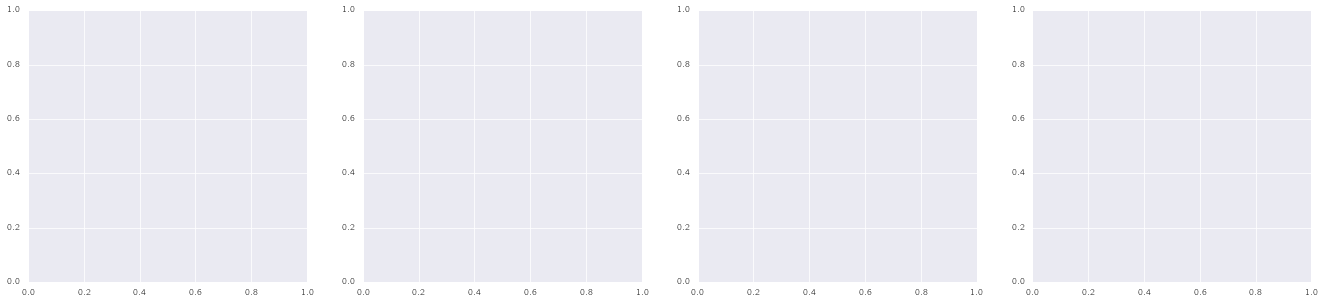

In [30]:
from matplotlib import rc
rc('text.latex', preamble=r'\usepackage{cmbright}')
rc('text', usetex=True)

sns.set_theme()
sns.set_context("paper")

seeds = [1,2,3,4,5]
n_clients = 10
n_pub = [500, 1000, 5000, 30000, 60000]
model = "emnist_cnn1"
dists = ["niid10.0", "niid1.0", "niid0.1", "niid0.01"]
schemes = [0, 1, 2]
student_model = "cnn3"

data = []
for d in dists:
    for n in n_pub:
        for w in schemes:
            settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
            feded_accs, _ = get_feded_results(settings_files, n, student_model, "mse", w, summary=False)
            for i in seeds:
                data.append([n, feded_accs[i-1], d, w])

df = pd.DataFrame(data, columns=['public samples', 'Test accuracy', 'Dist', 'Scheme'])

fig, ax = plt.subplots(1, 4, figsize=(23, 5))
sns.lineplot(ax=ax[0], data=df[df.Dist == 'niid10.0'], x='public samples', y='Test accuracy', hue='Scheme')
sns.lineplot(ax=ax[1], data=df[df.Dist == 'niid1.0'], x='public samples', y='Test accuracy', hue='Scheme')
sns.lineplot(ax=ax[2], data=df[df.Dist == 'niid0.1'], x='public samples', y='Test accuracy', hue='Scheme')
sns.lineplot(ax=ax[3], data=df[df.Dist == 'niid0.01'], x='public samples', y='Test accuracy', hue='Scheme')
ax[0].set_title(r'$\alpha=10$')
ax[1].set_title(r'$\alpha=1$')
ax[2].set_title(r'$\alpha=0.1$')
ax[3].set_title(r'$\alpha=0.01$')
plt.savefig('../../thesis_images/mnist_w2_npub.png', dpi=300)
plt.show()

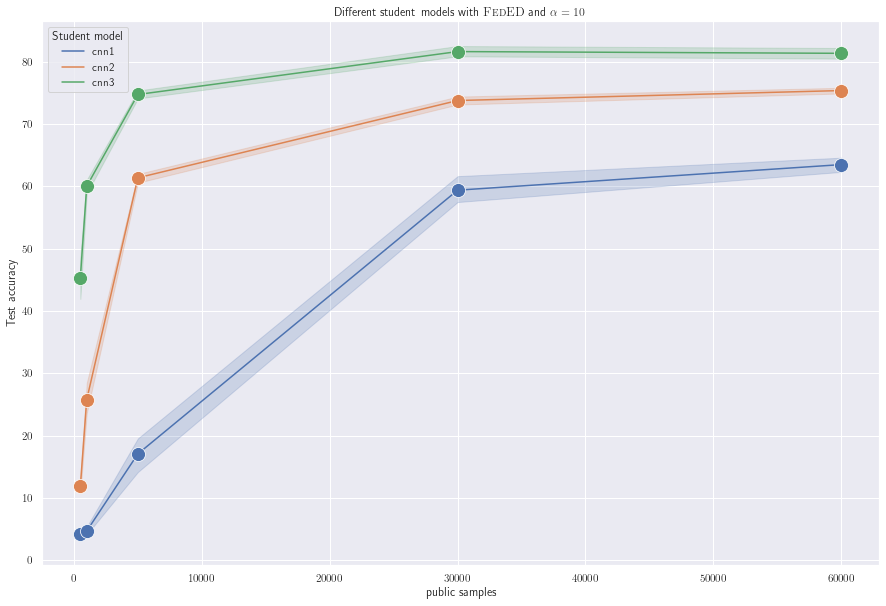

In [26]:
sns.set_theme()
plt.rcParams['text.usetex'] = True
rc('text.latex', preamble=r'\usepackage{cmbright}')
plt.rcParams.update({'font.size': 48})
seeds = [1,2,3,4,5]
n_clients = 10
n_pub = [500, 1000, 5000, 30000, 60000]
model = "emnist_cnn1"
students = ["cnn1", "cnn2", "cnn3"]
dist = "niid10.0"

data = []
for stu in students:
    for n in n_pub:
        settings_files = [f"{model}_c{n_clients}_{dist}_s{i}" for i in seeds]
        feded_accs, _ = get_feded_results(settings_files, n, stu, "mse", 2, summary=False)
        for i in seeds:
            data.append([n, feded_accs[i-1], stu])

df = pd.DataFrame(data, columns=['public samples', 'Test accuracy', 'Student model'])

fig, ax = plt.subplots(1, figsize=(15, 10))
sns.lineplot(ax=ax, data=df, x='public samples', y='Test accuracy', hue='Student model', marker='o', markersize=14)
ax.set_title(r'Different student models with $\textsc{FedED}$ and $\alpha=10$')
plt.show()